# Preprocessing & Feature Selection

- Clean data
- Normalize data
- Study the opportunity of a reduction in size

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn import linear_model

## Load x_train, x_val, x_test

In [2]:
with open('../data/df_train.csv', 'rb') as handle:
    df_train = pickle.load(handle)
with open('../data/x_train.pickle', 'rb') as handle:
    x_train = pickle.load(handle)
with open('../data/x_val.pickle', 'rb') as handle:
    x_val = pickle.load(handle)
with open('../data/df_test.csv', 'rb') as handle:
    x_test = pickle.load(handle)


with open('../data/y_train.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

# Select features

## Correlation Matrix to select features

In [3]:
MIN_R = 0.2 # 0.25 pas terrible dans l'ensemble les scores sont tous plus mauvais !
def selectFeaturesWithCorrMatrix(df, MIN_R):
    corr = df.corr().round(2)
    corr_cols = corr[corr['category'] > MIN_R]
    cols = corr_cols.index.tolist()
    cols.pop()

    return cols

In [4]:
cols = selectFeaturesWithCorrMatrix(df_train, MIN_R)
#x_train = x_train[cols]
#x_val = x_val[cols]
#x_test = x_test[cols]


del x_train['music_id']
del x_val['music_id']
del x_test['music_id']
cols = x_train.columns

## Replace null variables

In [5]:
# Remplacer les valeurs null par la moyenne de sa colonne
def replaceNan(df, cols):
    for col in cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

In [6]:
x_train = replaceNan(x_train, cols)
x_val = replaceNan(x_val, cols)
x_test = replaceNan(x_test, cols)

In [7]:
x_train

,chroma_0_mean,chroma_0_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_1_mean,chroma_1_std,chroma_2_mean,chroma_2_std,...,mfcc_9_mean,mfcc_9_std,onset_rate,spectral_centroid_mean,spectral_decrease_mean,spectral_flux_mean,spectral_rolloff_mean,spectral_spread_mean,zcr_mean,zcr_std
209,70.791122,163.699081,369.866669,1465.036743,178.248840,671.576294,50.826832,93.769897,85.228027,157.262115,...,-0.091669,1.361805,0.899600,6.063651,-0.603325,0.660634,451.315789,526.813705,83.948616,64.165931
140,468.056946,632.560791,430.321045,831.604492,328.187561,435.642975,505.974976,689.617981,545.187866,673.700439,...,-0.270107,0.676056,5.164371,13.047741,-0.313593,1.946845,687.719298,471.083117,130.139205,96.134255
217,191.719193,628.707397,150.158432,327.630035,186.834839,765.841553,239.315308,480.464569,544.781616,1369.623535,...,-0.006208,0.815768,2.165704,13.351412,-0.299999,0.773146,644.736842,175.422860,58.595994,51.924638
194,361.528320,490.870331,294.944824,301.517273,224.651199,175.547073,263.284180,199.808456,253.435593,210.436996,...,0.163288,0.629687,6.563749,52.490721,0.018454,1.164197,2664.912281,5297.142258,274.164371,113.195602
5,623.636475,1185.141235,356.477631,438.765228,436.773651,584.193237,519.140076,607.874695,886.185425,1343.947998,...,-0.179700,0.817544,4.731231,33.695191,0.006474,1.644274,1310.964912,753.759663,179.852651,88.762234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,571.056824,894.451050,741.833618,1241.861450,608.731567,824.415649,476.927795,599.432190,579.306335,964.353333,...,-0.183939,0.655275,7.263438,20.244460,-0.080681,2.165593,687.719298,1080.146025,157.830812,88.971850
192,393.516907,803.091125,390.568726,587.812866,273.772430,315.944153,455.278534,672.099854,622.944763,1222.362305,...,-0.650424,0.630010,2.065749,27.966352,-0.176784,0.988198,1332.456140,1582.072342,193.404034,144.831127
117,361.939575,668.740662,355.878479,542.526611,352.132111,677.561829,496.181549,1015.563232,471.400238,841.204224,...,0.321945,0.548514,8.629498,52.016057,-0.007314,3.354519,1547.368421,5165.159696,293.644780,154.587810
47,1430.914062,954.344788,1371.248047,779.447571,1285.536133,663.518921,1438.249023,940.036377,1135.658081,634.414917,...,-0.027949,0.499639,7.604598,33.298050,0.042227,3.631802,1267.982456,4049.222312,532.607710,168.902977


## Normalize data

## RobustScaler - MinMaxScaler - StandartScaler

<AxesSubplot:>

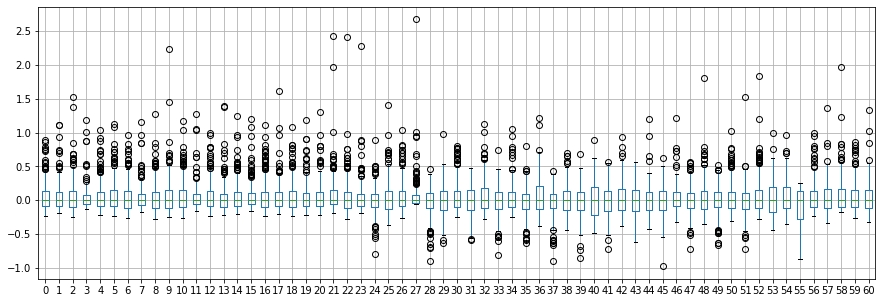

In [8]:
scaler = RobustScaler(quantile_range=(1, 99))
#scaler = MinMaxScaler()
# scaler = StandardScaler()
x_train_scaler = pd.DataFrame(scaler.fit_transform(x_train))
x_train_scaler.columns = x_train_scaler.columns
x_train_scaler.boxplot(figsize=(15,5))

In [9]:
x_val_scaler = pd.DataFrame(scaler.transform(x_val))
x_val_scaler.columns = x_val_scaler.columns

x_test_scaler = pd.DataFrame(scaler.transform(x_test))
x_test_scaler.columns = x_val.columns

## Regularization with Lasso to find usefull features

In [10]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train, y_train)

Lasso(alpha=0.1)

In [15]:
clf.coef_

array([-4.58405657e-04,  4.46971535e-04, -1.04024228e-03,  1.68935384e-04,
       -4.66422137e-05, -4.40680879e-05,  1.76814992e-04,  2.33028005e-04,
       -1.15223146e-03,  5.78594321e-04,  2.38201454e-04,  5.60200019e-04,
       -8.95514629e-04,  4.61781636e-04, -0.00000000e+00,  5.78385529e-05,
        8.62165819e-04, -5.50695921e-05,  7.04832787e-04, -1.38124396e-04,
       -2.62765973e-04,  1.44492135e-04, -1.13687211e-03,  8.12337960e-04,
       -0.00000000e+00, -7.98939701e-04, -6.07744605e-05,  1.03097060e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  8.50334646e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

The closer the coefficients are to 0, the less useful the column is <br>
So we will select the columns :
- 2 = 4.46971535e-04
- 10 = 5.78594321e-04
- 12 = 5.60200019e-04
- 14 = 4.61781636e-04
- 17 = 8.62165819e-04
- 19 = 7.04832787e-04
- 24 = 8.12337960e-04
- 28 = 1.03097060e-02
- 42 = 8.50334646e-02
- 54 = 2.08508214e-01
- 60 = 2.00233725e-03
- 61 = 3.16469266e-03

In [47]:
cols = [1,9,11,13,16,18,23,27,41,53,59,60]
df_cols = pd.DataFrame(x_train.columns)
df_cols = df_cols.iloc[cols]
df_cols[0].tolist()

['chroma_0_std',
 'chroma_2_std',
 'chroma_3_std',
 'chroma_4_std',
 'chroma_6_mean',
 'chroma_7_mean',
 'chroma_9_std',
 'chroma_min',
 'mfcc_4_mean',
 'onset_rate',
 'zcr_mean',
 'zcr_std']

In [48]:
x_train = x_train[df_cols]
x_val = x_val[df_cols]
x_test = x_test[df_cols]

## PCA

In [50]:
pca = PCA(n_components=5)
x_train_pca = pca.fit_transform(x_train_scaler)
x_val_pca = pca.transform(x_val_scaler)
x_test_pca = pca.transform(x_test_scaler)

In [51]:
# Pour étudier la variance expliqué par chaque axe :
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio


array([0.25951844, 0.14848772, 0.07687958, 0.05714926, 0.04877565])

<AxesSubplot:ylabel='Count'>

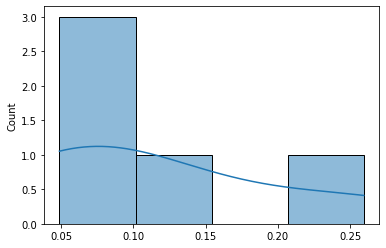

In [52]:
# utiliser Seaborn pour visualiser explained_variance_ratio
sns.histplot(explained_variance_ratio, kde=True)

## Save preproc data

In [53]:
with open('../data/x_train_preproc.pickle', 'wb') as handle:
    pickle.dump(x_train_pca, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/x_val_preproc.pickle', 'wb') as handle:
    pickle.dump(x_val_pca, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/x_test_preproc.pickle', 'wb') as handle:
    pickle.dump(x_test_pca, handle, protocol=pickle.HIGHEST_PROTOCOL)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2011f815-0780-43fd-b5d6-053a5c8d7739' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>